In [307]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.tools.tools import add_constant
from statsmodels.stats import outliers_influence
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC


In [172]:
from matplotlib.pyplot import style
plt.style.use('ggplot')

In [63]:
df = pd.read_csv("../data/cookies.csv")

In [64]:
df.head(20)

sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0                   0.25         9.50        300        15.0     136.0   
1                   0.23         3.30        520        34.0     113.0   
2                   0.18         1.90        360        33.0     106.0   
3                   0.18        10.50        490        41.0     124.0   
4                   0.24         2.40        770         6.0      33.0   
5                   0.22        18.15        500        23.0     139.0   
6                   0.39         2.30        410        31.0     102.0   
7                   0.39         2.60        440        30.0     180.0   
8                   0.18         1.80        700        13.0      40.0   
9                   0.17        12.90        330        59.0     186.0   
10                  0.49         9.60        300        45.0     197.0   
11                  0.29         3.30        370        32.0     140.0   
12                  0.25         7.50        300        18.0     117.0   
13                  0.48         4.00       1860        64.0     150.0   
14                  0.58        16.75        500        43.0     163.0   
15                  0.34         3.40        360        34.0     200.0   
16                  0.02          NaN        670         9.0      23.0   
17                  0.34         7.60        450        25.0     118.0   
18                  0.26         1.40        410        40.0     141.0   
19                  0.05         2.10        610        20.0      49.0   

    density     pH  grams baking soda  bake time  quality butter type  weight  \
0   0.99367   8.10               0.44       12.1        8      melted    15.2   
1   0.99429   8.16               0.48        8.4        7      melted    12.4   
2   0.98746   8.21               0.83       14.0        9      melted     9.4   
3   0.99630   8.14               0.35       10.5        7      melted    12.2   
4   0.99740   8.09               0.57        9.4        5       cubed    19.8   
5   0.99904   8.06               0.50        9.2        7      melted    13.2   
6   0.99221   8.22               0.58       10.9        9      melted    13.2   
7   0.99410   8.46               0.44       10.8        9      melted    15.2   
8   0.99700   8.44               0.60        9.1        5       cubed    14.2   
9   0.99754   8.08               0.49        9.4        7      melted    13.8   
10  0.99380   8.13               0.38       12.3        9      melted    15.2   
11  0.98950   8.17               0.36       12.8        9      melted    12.6   
12  0.99116   8.09               0.38       13.0        8      melted    13.8   
13  0.99450   8.06               0.40        NaN        7      melted    12.8   
14  0.99990   8.15               0.54        9.2        7      melted    15.2   
15  0.99370   8.14               0.76       10.0        7      melted    13.0   
16  3.00000   8.47               0.67        9.4        6       cubed    14.0   
17  0.99222   8.03               0.37       11.0        8      melted    12.0   
18  0.99410  25.00               0.72        9.5        8      melted    13.0   
19  0.99705   8.31               0.55        9.7        3       cubed    14.6   

    diameter                 mixins  crunch factor  aesthetic appeal  
0          7                raisins           1.30                 3  
1          7                raisins           1.71                 3  
2          7        nuts, chocolate           1.78                 3  
3          7              chocolate           1.59                 3  
4          7  nuts, oats, chocolate           1.30                 3  
5          7              chocolate           1.16                 3  
6          7              chocolate           1.93                 3  
7          7              chocolate           1.51                 3  
8          7  nuts, oats, chocolate           1.89                 3  
9          7        nuts, chocolate  

### Exploring the data

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
sugar to flour ratio    5198 non-null float64
sugar index             5193 non-null float64
bake temp               5198 non-null int64
chill time              5198 non-null float64
calories                5198 non-null float64
density                 5198 non-null float64
pH                      5198 non-null float64
grams baking soda       5198 non-null float64
bake time               5188 non-null float64
quality                 5198 non-null int64
butter type             5198 non-null object
weight                  5198 non-null float64
diameter                5198 non-null int64
mixins                  5196 non-null object
crunch factor           5198 non-null float64
aesthetic appeal        5198 non-null int64
dtypes: float64(10), int64(4), object(2)
memory usage: 649.8+ KB


In [66]:
df.isna().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   2
crunch factor            0
aesthetic appeal         0
dtype: int64

In [67]:
df.shape

(5198, 16)

In [68]:
df.isna().sum()/df.shape[0]

sugar to flour ratio    0.000000
sugar index             0.000962
bake temp               0.000000
chill time              0.000000
calories                0.000000
density                 0.000000
pH                      0.000000
grams baking soda       0.000000
bake time               0.001924
quality                 0.000000
butter type             0.000000
weight                  0.000000
diameter                0.000000
mixins                  0.000385
crunch factor           0.000000
aesthetic appeal        0.000000
dtype: float64

Since the proportion of nulls for each variable is extremely low, we have decided to just drop the rows that have null rows

In [69]:
df = df.dropna().reset_index()

In [70]:
df.isna().sum()

index                   0
sugar to flour ratio    0
sugar index             0
bake temp               0
chill time              0
calories                0
density                 0
pH                      0
grams baking soda       0
bake time               0
quality                 0
butter type             0
weight                  0
diameter                0
mixins                  0
crunch factor           0
aesthetic appeal        0
dtype: int64

In [71]:
df.shape

(5181, 17)

In [72]:
df.drop("index", axis=1).head()

sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0                  0.25          9.5        300        15.0     136.0   
1                  0.23          3.3        520        34.0     113.0   
2                  0.18          1.9        360        33.0     106.0   
3                  0.18         10.5        490        41.0     124.0   
4                  0.24          2.4        770         6.0      33.0   

   density    pH  grams baking soda  bake time  quality butter type  weight  \
0  0.99367  8.10               0.44       12.1        8      melted    15.2   
1  0.99429  8.16               0.48        8.4        7      melted    12.4   
2  0.98746  8.21               0.83       14.0        9      melted     9.4   
3  0.99630  8.14               0.35       10.5        7      melted    12.2   
4  0.99740  8.09               0.57        9.4        5       cubed    19.8   

   diameter                 mixins  crunch factor  aesthetic appeal  
0         7                raisins           1.30                 3  
1         7                raisins           1.71                 3  
2         7        nuts, chocolate           1.78                 3  
3         7              chocolate           1.59                 3  
4         7  nuts, oats, chocolate           1.30                 3

Let's have a first look on potential outliers

In [73]:
df.describe()

index  sugar to flour ratio  sugar index    bake temp  \
count  5181.000000           5181.000000  5181.000000  5181.000000   
mean   2601.096892              0.318215     5.401718   559.496236   
std    1499.706365              0.149769     4.669065   353.265184   
min       0.000000              0.000000     0.600000    90.000000   
25%    1303.000000              0.240000     1.800000   380.000000   
50%    2602.000000              0.310000     3.000000   470.000000   
75%    3899.000000              0.390000     8.000000   640.000000   
max    5197.000000              3.000000    31.600000  6110.000000   

        chill time     calories      density           pH  grams baking soda  \
count  5181.000000  5181.000000  5181.000000  5181.000000        5181.000000   
mean     30.383903   115.022679     0.995435     8.221892           0.531002   
std      17.249170    56.468852     0.055723     0.283618           0.151002   
min       0.000000   -99.000000     0.987110     7.720000           0.220000   
25%      17.000000    76.000000     0.992300     8.110000           0.430000   
50%      29.000000   118.000000     0.994800     8.210000           0.510000   
75%      41.000000   155.000000     0.996910     8.320000           0.600000   
max     146.500000   366.500000     5.000000    25.000000           2.000000   

         bake time      quality       weight  diameter  crunch factor  \
count  5181.000000  5181.000000  5181.000000    5181.0    5181.000000   
mean     10.495561     7.325613    14.383922       7.0       1.499025   
std       1.194958     1.302336     3.027030       0.0       0.289244   
min       8.000000     3.000000   -99.000000       7.0       1.000000   
25%       9.500000     7.000000    12.800000       7.0       1.250000   
50%      10.300000     8.000000    14.000000       7.0       1.500000   
75%      11.300000     8.000000    15.400000       7.0       1.750000   
max      14.900000    11.000000    31.800000       7.0       2.000000   

       aesthetic appeal  
count       5181.000000  
mean           3.000579  
std            0.024059  
min            3.000000  
25%            3.000000  
50%            3.000000  
75%            3.000000  
max            4.000000

We are doing a plot to know more about potential outliers, and for that we are just selecting numerical columns

In [74]:
df.columns

Index(['index', 'sugar to flour ratio', 'sugar index', 'bake temp',
       'chill time', 'calories', 'density', 'pH', 'grams baking soda',
       'bake time', 'quality', 'butter type', 'weight', 'diameter', 'mixins',
       'crunch factor', 'aesthetic appeal'],
      dtype='object')

In [75]:
numerical_columns = ['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time',
       'weight','crunch factor', "quality"]

In [76]:
df_numerical = df[numerical_columns]

In [77]:
df_numerical.head()

sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0                  0.25          9.5        300        15.0     136.0   
1                  0.23          3.3        520        34.0     113.0   
2                  0.18          1.9        360        33.0     106.0   
3                  0.18         10.5        490        41.0     124.0   
4                  0.24          2.4        770         6.0      33.0   

   density    pH  grams baking soda  bake time  weight  crunch factor  quality  
0  0.99367  8.10               0.44       12.1    15.2           1.30        8  
1  0.99429  8.16               0.48        8.4    12.4           1.71        7  
2  0.98746  8.21               0.83       14.0     9.4           1.78        9  
3  0.99630  8.14               0.35       10.5    12.2           1.59        7  
4  0.99740  8.09               0.57        9.4    19.8           1.30        5

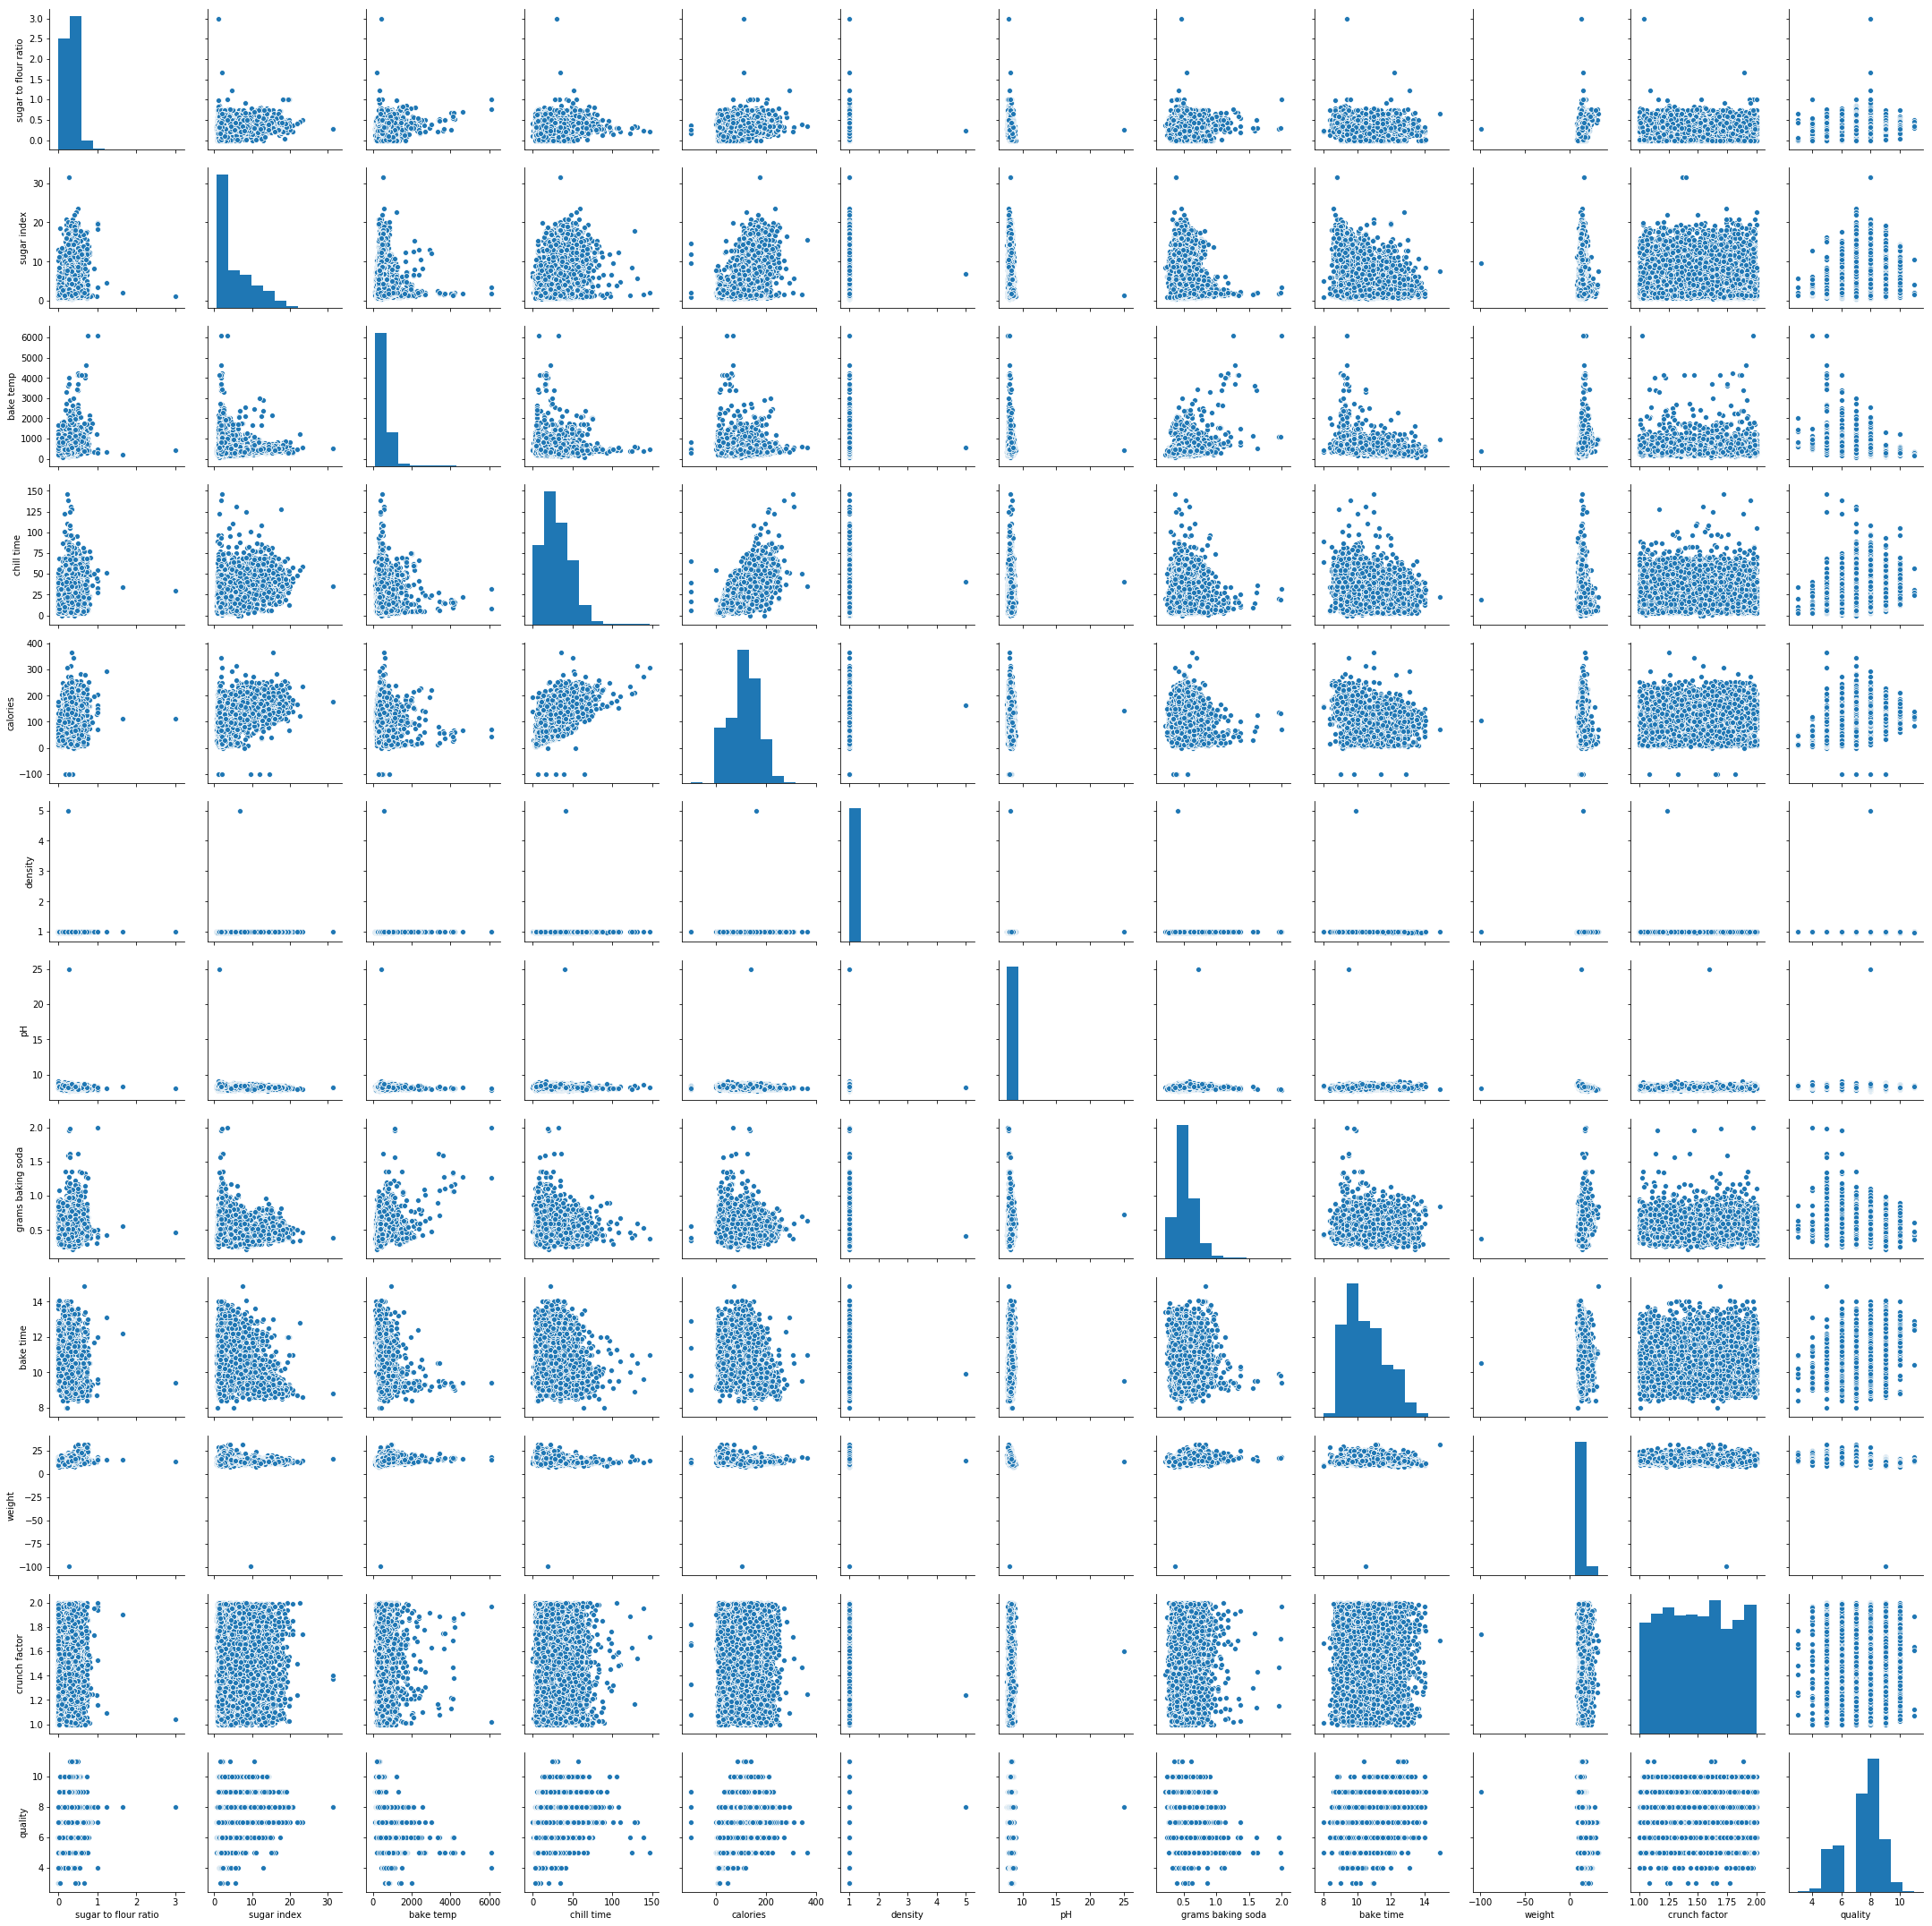

In [89]:
sns.pairplot(df_numerical, height=2.5)

We can see in the exploratory pairplot above a bunch of what it looks like outliers. Since we don't want not representative data affecting our final results, we are going to set a threshold of 3 standard deviations from the mean of each variable to consider the values as outliers, and after doing so, we will drop them.

In [79]:
z = np.abs(sc.stats.zscore(df_numerical))
threshold = 3
outliers = np.where(z > threshold)

In [80]:
len(outliers[0])

309

In [81]:
len(outliers[0])/df_numerical.shape[0]

0.059640995946728434

This means that almost 6% of the ows we are working with are outliers. It is a considerable proportion, but still the trade-off of getting rid of them is positive.

In [82]:
df_wo = df.drop(outliers[0])

In [83]:
df.shape

(5181, 17)

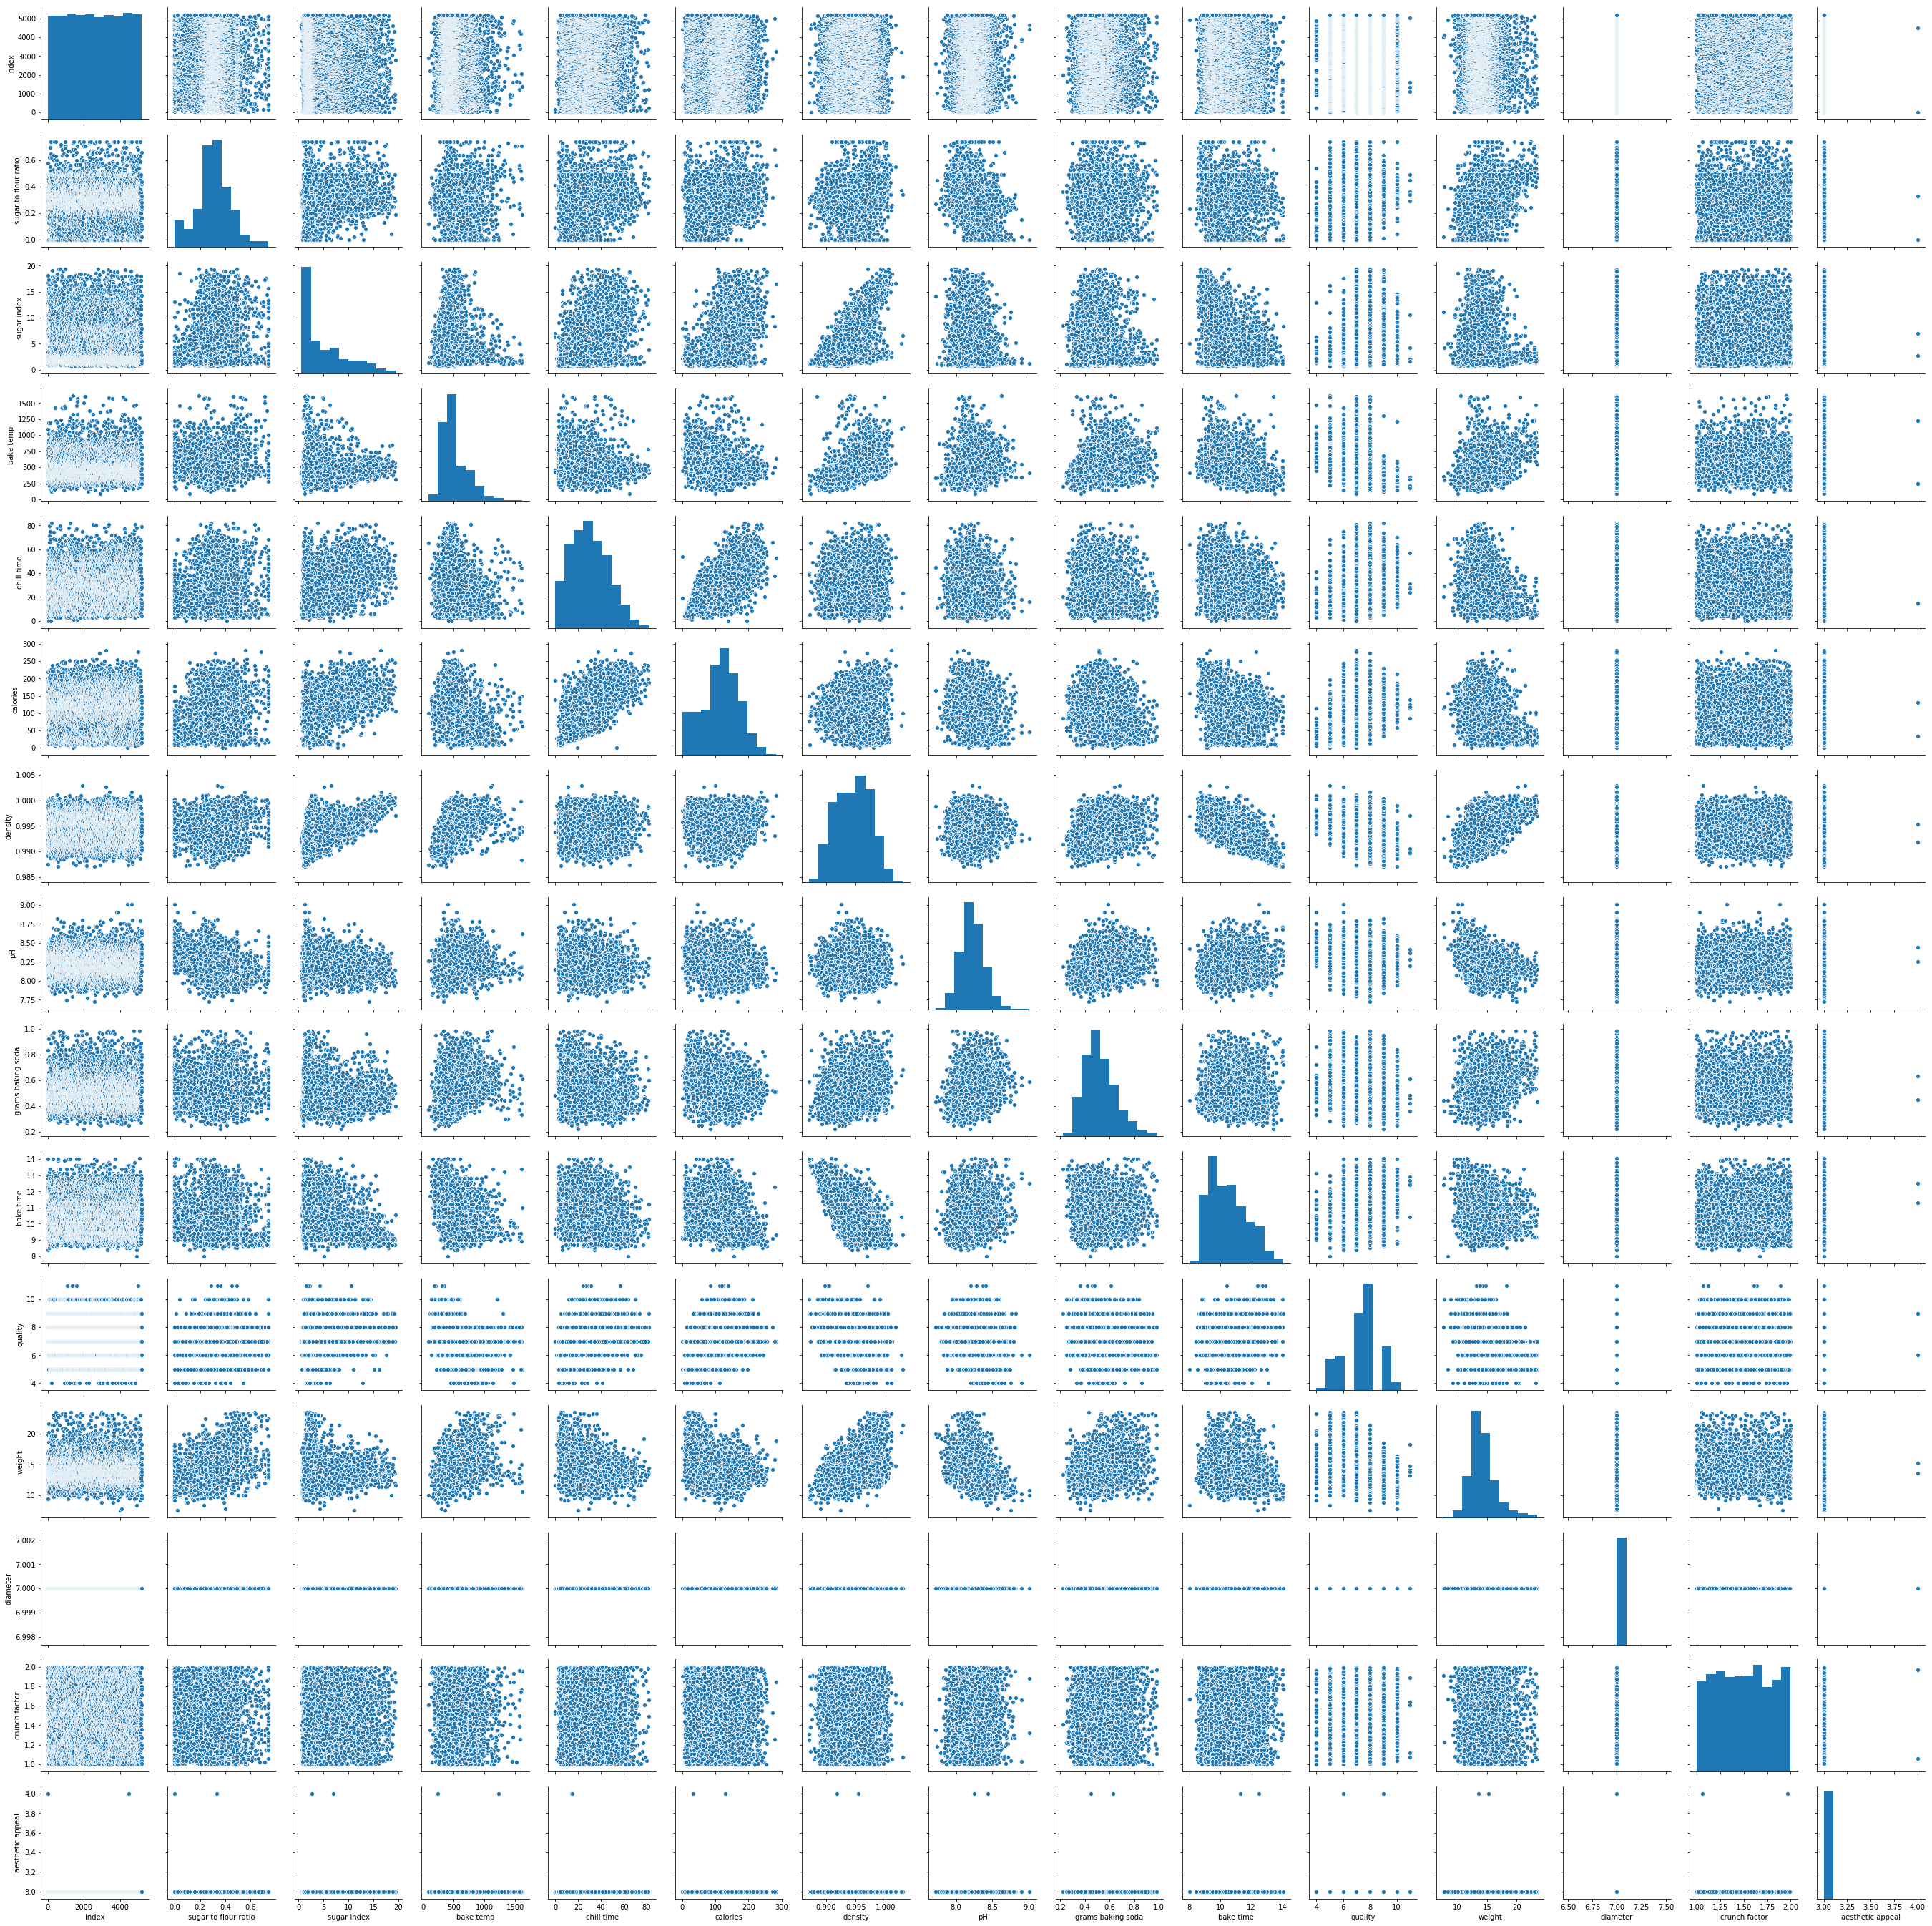

In [90]:
sns.pairplot(df_wo, height=2.5)

Now the visual exploration is cleaner. Outliers are removed.

In [85]:
df_wo.columns

Index(['index', 'sugar to flour ratio', 'sugar index', 'bake temp',
       'chill time', 'calories', 'density', 'pH', 'grams baking soda',
       'bake time', 'quality', 'butter type', 'weight', 'diameter', 'mixins',
       'crunch factor', 'aesthetic appeal'],
      dtype='object')

Changing the order of columns, leaving the target at the end

In [86]:
df_wo[['index', 'sugar to flour ratio', 'sugar index', 'bake temp',
       'chill time', 'calories', 'density', 'pH', 'grams baking soda',
       'bake time', 'butter type', 'weight', 'diameter', 'mixins',
       'crunch factor', 'aesthetic appeal', 'quality']].head()

index  sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0      0                  0.25          9.5        300        15.0     136.0   
1      1                  0.23          3.3        520        34.0     113.0   
2      2                  0.18          1.9        360        33.0     106.0   
3      3                  0.18         10.5        490        41.0     124.0   
4      4                  0.24          2.4        770         6.0      33.0   

   density    pH  grams baking soda  bake time butter type  weight  diameter  \
0  0.99367  8.10               0.44       12.1      melted    15.2         7   
1  0.99429  8.16               0.48        8.4      melted    12.4         7   
2  0.98746  8.21               0.83       14.0      melted     9.4         7   
3  0.99630  8.14               0.35       10.5      melted    12.2         7   
4  0.99740  8.09               0.57        9.4       cubed    19.8         7   

                  mixins  crunch factor  aesthetic appeal  quality  
0                raisins           1.30                 3        8  
1                raisins           1.71                 3        7  
2        nuts, chocolate           1.78                 3        9  
3              chocolate           1.59                 3        7  
4  nuts, oats, chocolate           1.30                 3        5

We are also going to drop the columns that do not contribute much to explain the variance of the target variable, which we know because they themselves barely vary

In [87]:
low_variance = []

for col in df_wo._get_numeric_data():
    minimum = min(df_wo[col])
    ninety_five_perc = np.percentile(df_wo[col], 95)
    if ninety_five_perc == minimum:
        low_variance.append(col)

print(low_variance)

['diameter', 'aesthetic appeal']


So, we are dropping diameter and aesthetical appeal

In [92]:
df_wo = df_wo.drop(low_variance, axis=1)

In [93]:
df_wo.head(2)

index  sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0      0                  0.25          9.5        300        15.0     136.0   
1      1                  0.23          3.3        520        34.0     113.0   

   density    pH  grams baking soda  bake time  quality butter type  weight  \
0  0.99367  8.10               0.44       12.1        8      melted    15.2   
1  0.99429  8.16               0.48        8.4        7      melted    12.4   

    mixins  crunch factor  
0  raisins           1.30  
1  raisins           1.71

Next we are going to check correlations between numeric variables to spot potential collinearity problems

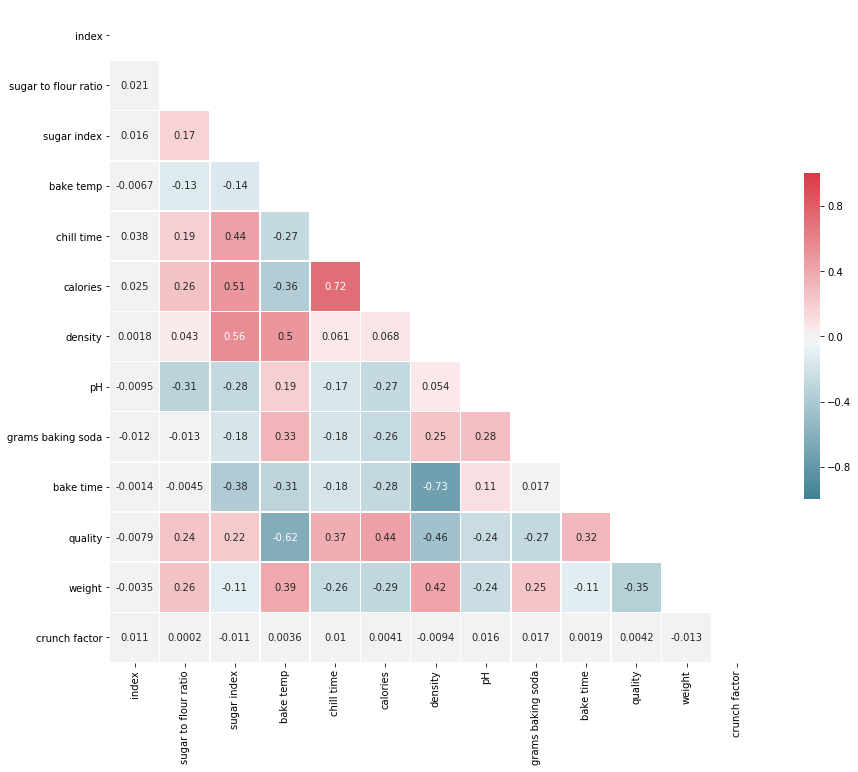

In [98]:
corr=df_wo._get_numeric_data().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Just with the correlation matrix is not enough to detect collinearity, so we are going to set the dataframe up to apply the right method - Variance inflation factor

In [100]:
df_clean = df_wo.drop("index", axis=1)

Copy of the clean dataset

In [134]:
df_clean = df_wo.copy()

Reordering the columns for a better manipulation

In [135]:
df_clean = df_clean[['sugar to flour ratio', 'sugar index', 'bake temp',
       'chill time', 'calories', 'density', 'pH', 'grams baking soda',
       'bake time', 'weight', 'crunch factor','quality','butter type',
        'mixins']]

In [136]:
df_clean.columns

Index(['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time', 'weight',
       'crunch factor', 'quality', 'butter type', 'mixins'],
      dtype='object')

#### Multicollinearity check

In [168]:
qt_df_clean = df_clean.iloc[:,:-3]

X = add_constant(qt_df_clean)

mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])], 
              index=X.columns)

mc_check

const                   2.103333e+06
sugar to flour ratio    1.349079e+00
sugar index             7.971820e+00
bake temp               2.315787e+00
chill time              2.136550e+00
calories                2.908264e+00
density                 1.868638e+01
pH                      2.752802e+00
grams baking soda       1.507464e+00
bake time               5.472369e+00
weight                  4.481804e+00
crunch factor           1.001254e+00
dtype: float64

We can see by checking the variance inflation factor that there are variables linearly highly correlated, and this poses a problem moving forward upon estimating the parameters of our model to predict quality cookies. VIF values > 3 are believed to be source of multicolinearity  issues. So, in order to avoid this, we are going to proceed to remove the variable with the highest VIF, which is density, and then we will see how the VIF of the reamining features, behaves.

In [170]:
df_clean2 = df_clean.drop("density", axis=1)

In [171]:
qt_df_clean2 = df_clean2.iloc[:,:-3]

X = add_constant(qt_df_clean2)

mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])], 
              index=X.columns)

mc_check

const                   4343.506321
sugar to flour ratio       1.327423
sugar index                1.558910
bake temp                  1.735402
chill time                 2.133383
calories                   2.833838
pH                         1.463785
grams baking soda          1.277984
bake time                  1.543669
weight                     1.709565
crunch factor              1.001031
dtype: float64

By dropping density feature, we have eliminated multicollinearity problems, so the parameters of our model will not be distorted/biased.

#### Unrealistic data proportions

We want to show boxplots in order to uncover potential unrealistic scales of some features

In [138]:
labels = df_clean.columns.to_list()

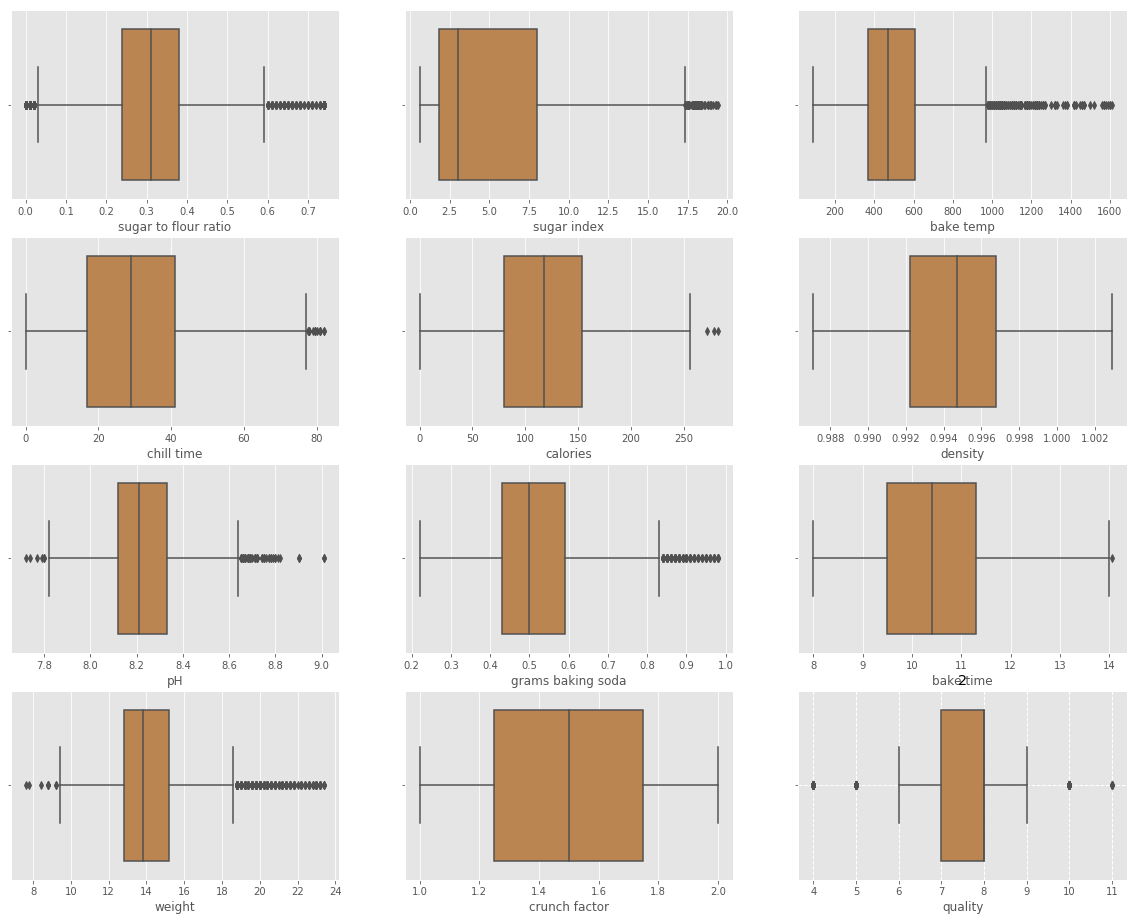

In [140]:
labels_y = labels[:-2]

fig, [ax1,ax2, ax3, ax4] = plt.subplots(4,3,figsize=(20,16))

for i in range(3):
    sns.boxplot(df_clean[labels_y[0+i]], ax=ax1[i], color="peru")
    sns.boxplot(df_clean[labels_y[3+i]],ax=ax2[i], color="peru")
    sns.boxplot(df_clean[labels_y[6+i]],ax=ax3[i], color="peru")
    sns.boxplot(df_clean[labels_y[9+i]],ax=ax4[i], color="peru")
    plt.title(f"{i}")
    plt.grid(linestyle="--", linewidth=1)


Bringing reality to our data analysis, we can know that we the maximum temperature that an oven can stand is 550 Fahrenheit degrees, so that means that above 30% of the cookies have recorded an unreailistic baking temperature.

In [148]:
df_clean[df_clean["bake temp"]>550]["bake temp"].count()

1509

In [149]:
df_clean[df_clean["bake temp"]>550]["bake temp"].count() / df_clean.shape[0]

0.3076452599388379

Then, we also believe that cookies below 10 calories are not realistic, so we need to do something with them

In [151]:
df_clean[df_clean["calories"]<10]["calories"].count()

27

Relationship between quality and temperature

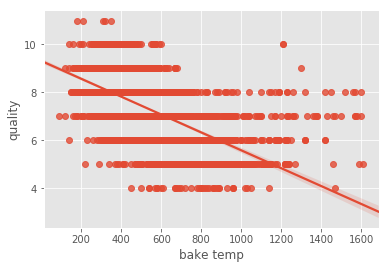

In [153]:
sns.regplot(x=df_clean["bake temp"], y=df_clean["quality"])

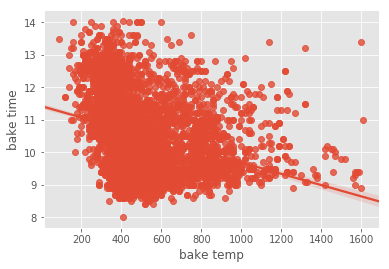

In [154]:
sns.regplot(x=df_clean["bake temp"], y=df_clean["bake time"])

Less baking time, more temperature. Probably they wantedto be done faster.

In [157]:
df_clean["bake temp"].mean() #271 celsius degrees

520.9072375127421

In [158]:
df_clean["bake temp"].median()

470.0

In [160]:
df_clean["bake temp"].describe()

count    4905.000000
mean      520.907238
std       213.670757
min        90.000000
25%       370.000000
50%       470.000000
75%       610.000000
max      1610.000000
Name: bake temp, dtype: float64

What we have decided to do, is to rescale the variable to realistic values. We have learnt that the common temperature to bake cookies is 350 F degrees, so we are rescaling our up-scaled values to a range that goes from 300 to 400

In [192]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(300, 400))
scaled_array = min_max_scaler.fit_transform(np.array(df_clean2[["bake temp"]].values))

/home/salva/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [195]:
len(scaled_array)

4905

In [233]:
df_clean2 = df_clean.copy()

In [234]:
df_clean2.shape

(4905, 14)

In [235]:
df_clean2["bake temp"] = scaled_array

In [236]:
df_clean2.head()

sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0                  0.25          9.5      166.0        15.0     136.0   
1                  0.23          3.3      143.0        34.0     113.0   
2                  0.18          1.9      136.0        33.0     106.0   
3                  0.18         10.5      154.0        41.0     124.0   
4                  0.24          2.4       63.0         6.0      33.0   

   density    pH  grams baking soda  bake time  weight  crunch factor  \
0  0.99367  8.10               0.44       12.1    15.2           1.30   
1  0.99429  8.16               0.48        8.4    12.4           1.71   
2  0.98746  8.21               0.83       14.0     9.4           1.78   
3  0.99630  8.14               0.35       10.5    12.2           1.59   
4  0.99740  8.09               0.57        9.4    19.8           1.30   

   quality butter type                 mixins  
0        8      melted                raisins  
1        7      melted                raisins  
2        9      melted        nuts, chocolate  
3        7      melted              chocolate  
4        5       cubed  nuts, oats, chocolate

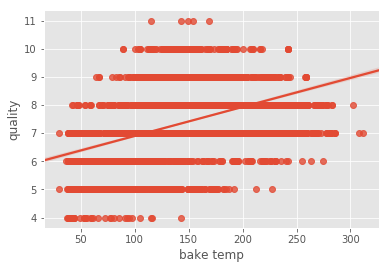

In [237]:
sns.regplot(x=df_clean2["bake temp"], y=df_clean2["quality"])

Still the relationship between quality and baking temperature holds, but in a more realistic manner

In [238]:
df_clean2["calories"].describe()

count    4905.000000
mean      115.903874
std        54.659775
min         0.000000
25%        80.000000
50%       118.000000
75%       154.000000
max       282.000000
Name: calories, dtype: float64

In [239]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(30, 282+30))
scaled_array = min_max_scaler.fit_transform(np.array(df_clean2[["calories"]].values))

In [240]:
df_clean2["calories"] = scaled_array

In [241]:
df_clean2["calories"].describe()

count    4905.000000
mean      145.903874
std        54.659775
min        30.000000
25%       110.000000
50%       148.000000
75%       184.000000
max       312.000000
Name: calories, dtype: float64

Same than for baking temperature but in this case applied to calories

In [242]:
df_clean2.describe()

sugar to flour ratio  sugar index    bake temp   chill time  \
count           4905.000000  4905.000000  4905.000000  4905.000000   
mean               0.309990     5.388848   145.903874    30.204485   
std                0.135283     4.577881    54.659775    16.107718   
min                0.000000     0.600000    30.000000     0.000000   
25%                0.240000     1.800000   110.000000    17.000000   
50%                0.310000     3.000000   148.000000    29.000000   
75%                0.380000     8.000000   184.000000    41.000000   
max                0.740000    19.400000   312.000000    82.000000   

          calories      density           pH  grams baking soda    bake time  \
count  4905.000000  4905.000000  4905.000000        4905.000000  4905.000000   
mean    145.903874     0.994517     8.223513           0.521511    10.519093   
std      54.659775     0.002855     0.161011           0.128971     1.196509   
min      30.000000     0.987110     7.720000           0.220000     8.000000   
25%     110.000000     0.992200     8.120000           0.430000     9.500000   
50%     148.000000     0.994700     8.210000           0.500000    10.400000   
75%     184.000000     0.996760     8.330000           0.590000    11.300000   
max     312.000000     1.002890     9.010000           0.980000    14.050000   

            weight  crunch factor      quality  
count  4905.000000    4905.000000  4905.000000  
mean     14.222528       1.498848     7.374312  
std       2.219423       0.289496     1.281119  
min       7.600000       1.000000     4.000000  
25%      12.800000       1.250000     7.000000  
50%      13.800000       1.500000     8.000000  
75%      15.200000       1.750000     8.000000  
max      23.400000       2.000000    11.000000

Next, we are going to divide categorical values into their own categories so that we can then create dummy variables of them for our model

In [243]:
df_clean2["butter type"].value_counts()

melted    3783
cubed     1122
Name: butter type, dtype: int64

In [244]:
df_clean2["mixins"].value_counts()

chocolate                         1807
raisins                           1130
chocolate, oats                    736
nuts, chocolate                    470
nuts,raisins                       314
nuts, oats, chocolate              262
nuts, oats                          98
chocolate, peanut butter            46
raisins, oats                       23
peanut butter                       13
oats                                 4
chocolate, oats, peanut butter       2
Name: mixins, dtype: int64

In [245]:
df_clean2 = df_clean2.reset_index()

We are splitting the different mixins that were present in the mixins column, into standalone columns for better processing.

In [246]:
lst = list(df_clean2["mixins"].unique())
string = str(lst)
string = string.replace('"', " ")
string = string.replace(',', " ")
string = string.replace("'", " ")
string = string.replace("]", " ")
string = string.replace("[", " ")
lst = list(set(string.split()))

def find_mixins(w):
   res = []
   for i in range(df_clean2.shape[0]):
       if w in df_clean2["mixins"][i]:
           res.append(1)
       else:
           res.append(0)
   return res

In [247]:
for w in lst:
    df_clean2[w] = find_mixins(w)

In [248]:
df_clean2.head()

index  sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0      0                  0.25          9.5      166.0        15.0     166.0   
1      1                  0.23          3.3      143.0        34.0     143.0   
2      2                  0.18          1.9      136.0        33.0     136.0   
3      3                  0.18         10.5      154.0        41.0     154.0   
4      4                  0.24          2.4       63.0         6.0      63.0   

   density    pH  grams baking soda  bake time  ...  crunch factor  quality  \
0  0.99367  8.10               0.44       12.1  ...           1.30        8   
1  0.99429  8.16               0.48        8.4  ...           1.71        7   
2  0.98746  8.21               0.83       14.0  ...           1.78        9   
3  0.99630  8.14               0.35       10.5  ...           1.59        7   
4  0.99740  8.09               0.57        9.4  ...           1.30        5   

   butter type                 mixins nuts  chocolate  peanut  oats  raisins  \
0       melted                raisins    0          0       0     0        1   
1       melted                raisins    0          0       0     0        1   
2       melted        nuts, chocolate    1          1       0     0        0   
3       melted              chocolate    0          1       0     0        0   
4        cubed  nuts, oats, chocolate    1          1       0     1        0   

   butter  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 21 columns]

In [249]:
df_clean2 = df_clean2.drop("mixins", axis=1)

In [250]:
df_clean2.head()

index  sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0      0                  0.25          9.5      166.0        15.0     166.0   
1      1                  0.23          3.3      143.0        34.0     143.0   
2      2                  0.18          1.9      136.0        33.0     136.0   
3      3                  0.18         10.5      154.0        41.0     154.0   
4      4                  0.24          2.4       63.0         6.0      63.0   

   density    pH  grams baking soda  bake time  weight  crunch factor  \
0  0.99367  8.10               0.44       12.1    15.2           1.30   
1  0.99429  8.16               0.48        8.4    12.4           1.71   
2  0.98746  8.21               0.83       14.0     9.4           1.78   
3  0.99630  8.14               0.35       10.5    12.2           1.59   
4  0.99740  8.09               0.57        9.4    19.8           1.30   

   quality butter type  nuts  chocolate  peanut  oats  raisins  butter  
0        8      melted     0          0       0     0        1       0  
1        7      melted     0          0       0     0        1       0  
2        9      melted     1          1       0     0        0       0  
3        7      melted     0          1       0     0        0       0  
4        5       cubed     1          1       0     1        0       0

In [252]:
df_clean2["butter cubed"] = pd.get_dummies(df_clean2['butter type'])["cubed"]
df_clean2["butter melted"] = pd.get_dummies(df_clean2['butter type'])["melted"]
df_clean2.head()

index  sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0      0                  0.25          9.5      166.0        15.0     166.0   
1      1                  0.23          3.3      143.0        34.0     143.0   
2      2                  0.18          1.9      136.0        33.0     136.0   
3      3                  0.18         10.5      154.0        41.0     154.0   
4      4                  0.24          2.4       63.0         6.0      63.0   

   density    pH  grams baking soda  bake time  ...  nuts  chocolate  peanut  \
0  0.99367  8.10               0.44       12.1  ...     0          0       0   
1  0.99429  8.16               0.48        8.4  ...     0          0       0   
2  0.98746  8.21               0.83       14.0  ...     1          1       0   
3  0.99630  8.14               0.35       10.5  ...     0          1       0   
4  0.99740  8.09               0.57        9.4  ...     1          1       0   

  oats  raisins  butter  cubed  melted  butter cubed  butter melted  
0    0        1       0      0       1             0              1  
1    0        1       0      0       1             0              1  
2    0        0       0      0       1             0              1  
3    0        0       0      0       1             0              1  
4    1        0       0      1       0             1              0  

[5 rows x 24 columns]

In [254]:
df_clean2 = df_clean2.drop(["cubed","melted","butter type"], axis=1)

### Data analysis

We are going to try to predict qality cookies from a set of explanatory variables through a linear regression model

In [258]:
df_clean2.drop("index", axis=1, inplace=True)

In [259]:
df_clean2.head()

sugar to flour ratio  sugar index  bake temp  chill time  calories  \
0                  0.25          9.5      166.0        15.0     166.0   
1                  0.23          3.3      143.0        34.0     143.0   
2                  0.18          1.9      136.0        33.0     136.0   
3                  0.18         10.5      154.0        41.0     154.0   
4                  0.24          2.4       63.0         6.0      63.0   

   density    pH  grams baking soda  bake time  weight  crunch factor  \
0  0.99367  8.10               0.44       12.1    15.2           1.30   
1  0.99429  8.16               0.48        8.4    12.4           1.71   
2  0.98746  8.21               0.83       14.0     9.4           1.78   
3  0.99630  8.14               0.35       10.5    12.2           1.59   
4  0.99740  8.09               0.57        9.4    19.8           1.30   

   quality  nuts  chocolate  peanut  oats  raisins  butter  butter cubed  \
0        8     0          0       0     0        1       0             0   
1        7     0          0       0     0        1       0             0   
2        9     1          1       0     0        0       0             0   
3        7     0          1       0     0        0       0             0   
4        5     1          1       0     1        0       0             1   

   butter melted  
0              1  
1              1  
2              1  
3              1  
4              0

In [328]:
y = df_clean2.iloc[:,11]

In [329]:
X = df_clean2.drop(["butter cubed","chocolate", "quality"], axis=1)

In [330]:
cookie_model = LinearRegression()

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [332]:
cookie_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [333]:
y_predict = cookie_model.predict(X_test)

In [334]:
r2_score(y_test, y_predict)

0.6719376253279667

In [335]:
X_train = sm.add_constant(X_train, prepend=False)
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     535.6
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:52:04   Log-Likelihood:                -4351.7
No. Observations:                3924   AIC:                             8735.
Df Residuals:                    3908   BIC:                             8836.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sugar to flour ratio     0.2180 

/home/salva/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


We are dropping the variables whose p-value for the t-statistic is above a significance level of 5%

In [336]:
X_2 = df_clean2.drop(["sugar to flour ratio", "crunch factor","butter cubed","chocolate", "quality"], axis=1)

In [337]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2)

In [338]:
cookie_model.fit(X_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [339]:
y_predict_2 = cookie_model.predict(X_test_2)

In [340]:
r2_score(y_test_2, y_predict_2)

0.6638067341775677

In [341]:
X_train_2 = sm.add_constant(X_train_2, prepend=False)
mod = sm.OLS(y_train_2, X_train_2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:53:38   Log-Likelihood:                -4333.3
No. Observations:                3924   AIC:                             8695.
Df Residuals:                    3910   BIC:                             8782.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sugar index           0.0823      0.00

/home/salva/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [342]:
cookie_model_rfe = RFE(cookie_model, 15)

In [343]:
cookie_model_rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=15, step=1, verbose=0)

In [344]:
print(cookie_model_rfe.support_)
print(cookie_model_rfe.ranking_)

[ True  True False  True False  True  True  True  True  True  True  True
  True  True  True  True  True False]
[1 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 1 4]


In [345]:
X_train.columns

Index(['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time', 'weight',
       'crunch factor', 'nuts', 'peanut', 'oats', 'raisins', 'butter',
       'butter melted', 'const'],
      dtype='object')

In [347]:
X_reduced = X_train[['sugar to flour ratio', 'sugar index', 'chill time',
        'density', 'pH', 'grams baking soda', 'bake time', 'weight',
       'crunch factor', 'nuts', 'peanut', 'oats', 'raisins', 'butter',
       'butter melted']]

In [349]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_train, test_size=0.20,\
                                                                                random_state=42)

In [351]:
cookie_model.fit(X_train_reduced, y_train_reduced)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [352]:
y_predict_reduced = cookie_model.predict(X_test_reduced)

In [354]:
r2_score(y_test_reduced, y_predict_reduced)

0.6430132109420377

In [353]:
X_train_reduced = sm.add_constant(X_train_reduced, prepend=False)
mod = sm.OLS(y_train_reduced, X_train_reduced)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     468.2
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:57:04   Log-Likelihood:                -3491.2
No. Observations:                3139   AIC:                             7012.
Df Residuals:                    3124   BIC:                             7103.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sugar to flour ratio     0.1757 

/home/salva/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
